In [80]:
import sys
sys.path.append("../../../../src")
import nanonets
import nanonets_utils
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

plt.style.use(["science","bright"])

In [81]:
N_p                 = 7
topology_parameter  = {
    "Nx"                : N_p,
    "Ny"                : N_p,
    "Nz"                : 1,
    "e_pos"             : [[(N_p-1)//2,0,0],[0,0,0],[N_p-1,0,0],[0,(N_p-1)//2,0],
                          [N_p-1,(N_p-1)//2,0],[0,N_p-1,0],[N_p-1,N_p-1,0],[(N_p-1)//2,N_p-1,0]],
    "electrode_type"    : ['constant','constant','constant','constant','constant','constant','constant','floating']
}
# topology_parameter  = {
#     "Nx"                : N_p,
#     "Ny"                : N_p,
#     "Nz"                : 1,
#     "e_pos"             : [[0,0,0], [int((N_p-1)/2),0,0], [N_p-1,0,0], 
#                             [0,int((N_p-1)/2),0], [0,N_p-1,0], [N_p-1,int((N_p)/2),0],
#                             [int((N_p)/2),(N_p-1),0], [N_p-1,N_p-1,0]],
#     "electrode_type"    : ['constant','constant','constant','constant','constant','constant','constant','floating']
# }

def run_magic_cable(time_steps, voltages, topology_parameter, radius=1e6, eq_steps=0):

    np_info2 = {
        'np_index'      : [(topology_parameter["Nx"]**2-1)-topology_parameter["Nx"]//2], 
        'mean_radius'   : radius,
        'std_radius'    : 0.0
    }

    target_electrode    = len(topology_parameter["e_pos"])-1
    sim_class           = nanonets.simulation(topology_parameter=topology_parameter, np_info2=np_info2)
    sim_class.run_var_voltages(voltages=voltages, time_steps=time_steps, target_electrode=target_electrode, stat_size=10, save=False, eq_steps=eq_steps)
    results             = sim_class.return_output_values()

    return results

Text(0.5, 0, '$t$ [ns]')

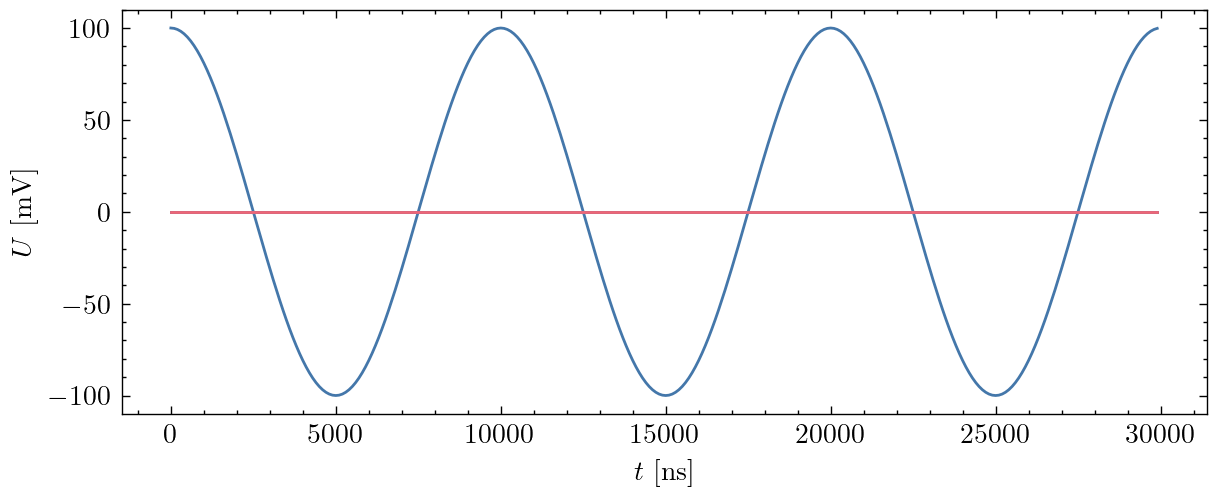

In [82]:
# Voltage Paramter
N_voltages              = 300
amplitudes              = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
frequencies             = [1e5,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
time_step               = 1e-7
time_steps, voltages    = nanonets_utils.sinusoidal_voltages(N_samples=N_voltages, topology_parameter=topology_parameter,
                                                             amplitudes=amplitudes, frequencies=frequencies, time_step=time_step)

# U_e                     = [0.085337,0.00,-0.03929,0.00,-0.022938,0.010342,0.002624,0.0]
# U_e_nand_11             = [-0.06575,0.00,0.063137,0.00,0.086903,0.020199,0.010013,0.0]
# time_steps, voltages    = nanonets_utils.logic_gate_time_series(U_e=U_e_nand_11, input_pos=[1,3], N_samples=N_voltages, step_size=time_step)

fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot()
ax.plot(time_steps*1e9, voltages*1000)
ax.set_ylabel('$U$ [mV]')
ax.set_xlabel('$t$ [ns]')

In [83]:
radius_vals = [10,20,40,80,160,320,640,1280,2560,5120,10240,20480,40960,81920,163840]
results     = []
for radius in radius_vals:
    val     = run_magic_cable(time_steps, voltages, topology_parameter, radius, 0)
    results.append(val)

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_73822/1833968354.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$t$ [$\mu$s]')


Text(0, 0.5, 'Input [mV]')

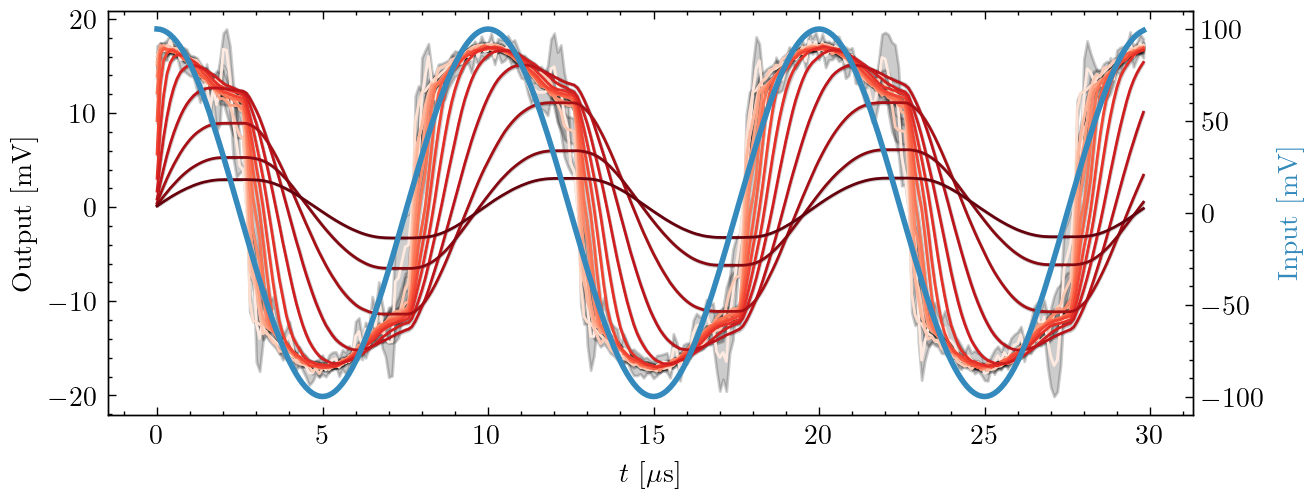

In [103]:
cmap = plt.get_cmap('Reds')

fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot()
for i in range(len(radius_vals)):
    ax.plot(time_steps[:-1]*1e6, results[i][:,2]*1000, c=cmap((i+1)/len(radius_vals)))
    ax.fill_between(time_steps[:-1]*1e6, results[i][:,2]*1000-results[i][:,3]*1000,
                    results[i][:,2]*1000+results[i][:,3]*1000, color='black', alpha=0.2)
ax.set_xlabel('$t$ [$\mu$s]')
ax.set_ylabel('Output [mV]')

ax2 = ax.twinx()
ax2.plot(time_steps[:-1]*1e6, voltages[:-1,0]*1000, nanonets_utils.blue_color, lw=2)
ax2.set_ylabel('Input [mV]', c=nanonets_utils.blue_color)

In [85]:
# fig = plt.figure(dpi=200, layout='constrained')
# fig.set_figwidth(fig.get_figwidth()*1.8)
# ax  = fig.add_subplot(3,1,1)
# for i in range(len(radius_vals)):
#     ax.errorbar(time_steps[:-1]*1e6, results[i][:,2]*1000, results[i][:,3]*1000)
# ax.set_ylabel('$U_O$ [mV]')
# ax.set_xticklabels("")
# # ax.set_ylim(20,25)

# ax  = fig.add_subplot(3,1,2)
# ax.plot(time_steps[:-1]*1e6,voltages[:-1,1]*1000)
# ax.set_ylabel('$U_1$ [mV]')
# ax.set_xticklabels("")

# ax  = fig.add_subplot(3,1,3)
# ax.plot(time_steps[:-1]*1e6,voltages[:-1,3]*1000)
# ax.set_ylabel('$U_2$ [mV]')
# ax.set_xlabel('$t$ [$\mu$s]')